# Assignment 4

Author(s):
* Walker Smith
* Helle Friis

In [111]:
print("Versions of the runtime and packages used for this assignment:")
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

print("-------------------------------------------------------")
print("When run on my machine the following versions were used:")
print("Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]")
print("pandas version: 1.5.3")
print("matplotlib version: 3.7.1")
print("NumPy version: 1.24.3")
print("scikit-learn version: 1.3.0")

Versions of the runtime and packages used for this assignment:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.1
-------------------------------------------------------
When run on my machine the following versions were used:
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.5.3
matplotlib version: 3.7.1
NumPy version: 1.24.3
scikit-learn version: 1.3.0


## Load the data set

In [89]:
from scipy.io import arff

# relative file path to the Attribute-Relation File Format (ARFF) file
filepath = './data/Rice_Cammeo_Osmancik.arff'

# load the data from the ARFF file
dataset = arff.loadarff(filepath)

# create a dataframe from the data
df = pd.DataFrame(dataset[0])

# format the byte string as a utf-8 string for improved readability
def format_class_name(class_name):
    return class_name.decode('utf-8')

target_feature_name = 'Class'

df = df.assign(Class=df[target_feature_name].apply(format_class_name))

df


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik


In [90]:
# Ensure the data is not missing any values
df.isnull().sum()
# Check my dataset for missing values
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

## Encode Categorical Features

In [91]:
# preprocess the data by encoding categorical features, in this case the target feature
from sklearn.preprocessing import LabelEncoder
# vector of class labels
y_label = df[target_feature_name]
# set of class labels
class_names = y_label.unique()
# create an instance of a label encoder
le = LabelEncoder()
# encode the class labels into integers
y_label = le.fit_transform(y_label)
# extract a set of feature names
feature_names = df.columns[:-1]

Remove the label vector for the clustering algorithm

In [92]:
X = df.drop(columns=[target_feature_name])

## Explore the data set

In [93]:
# 7 features
X.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')

In [94]:
# Review the distribution of classes
unique_values, counts = np.unique(y_label, return_counts=True)
for value, count in zip(unique_values, counts):
    print("Value {}: Count {}".format(value, count))

Value 0: Count 1630
Value 1: Count 2180


We can try to identify any obvious clusters in the data. This will not require the labels to be color coded, however it will be interesting to see if the clusters correspond to labels.

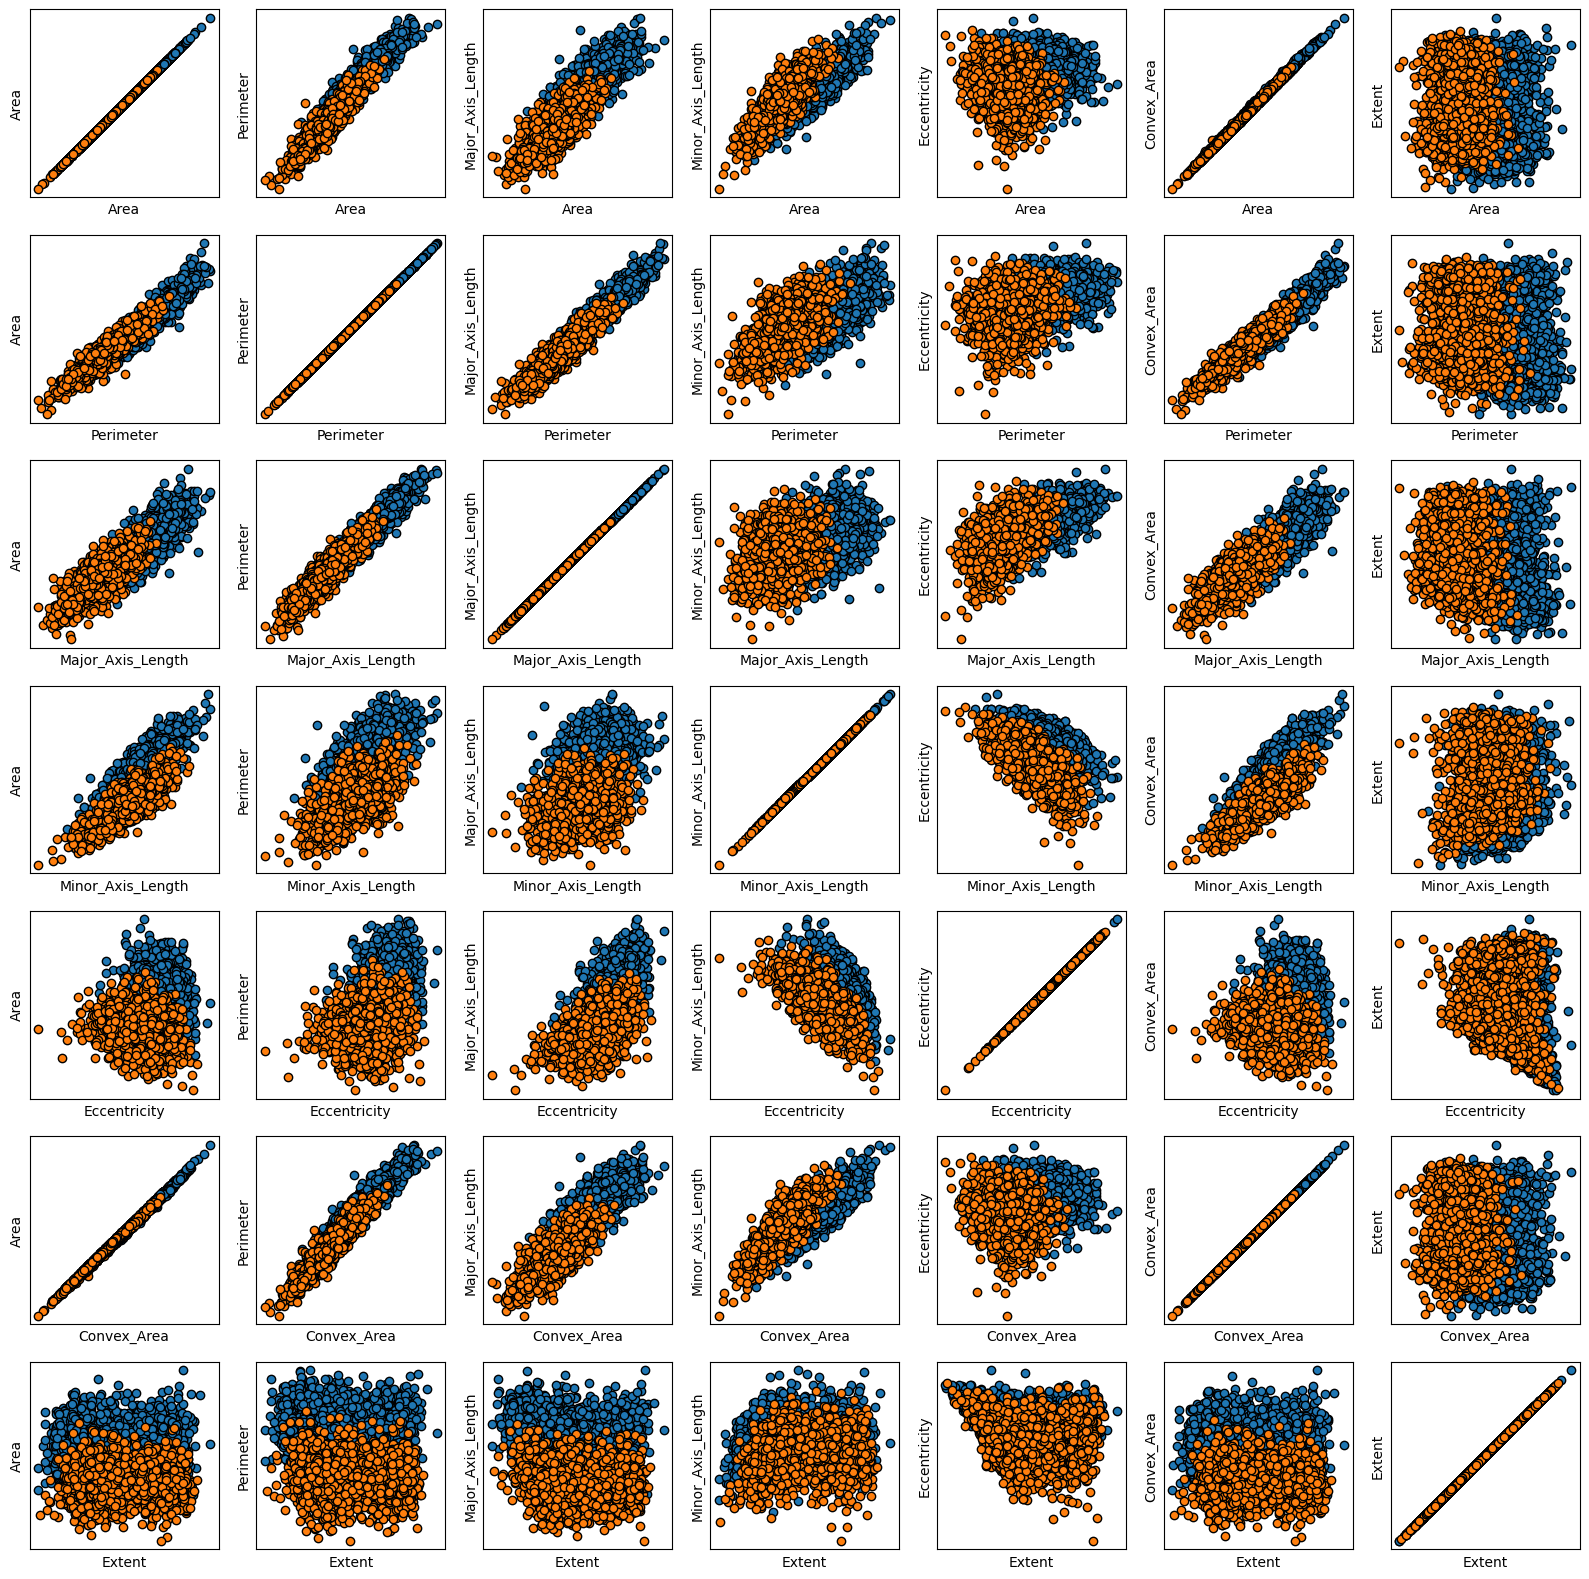

In [95]:
import itertools
import matplotlib.pyplot as plt
number_of_features = feature_names.size
feature_indicies = range(number_of_features)
# create a cartesian product of all the feature indicies
# to obtain coordinates for the subplots
cartesion_product = itertools.product(feature_indicies, feature_indicies)
# create a figure with a 7x7 grid of subplots
fig, axs = plt.subplots(number_of_features, number_of_features, figsize=(20, 20))
# plot the instances colored by the class label
for i, (feature_a_index, feature_b_index) in enumerate(cartesion_product):
    for j, class_name in enumerate(class_names):
        subplot = axs[feature_a_index, feature_b_index]
        feature_a_vector = X.iloc[:, feature_a_index:feature_a_index+1]
        feature_b_vector = X.iloc[:, feature_b_index:feature_b_index+1]
        subplot.scatter(
            feature_a_vector[y_label == j],
            feature_b_vector[y_label == j],
            label=class_name,
            edgecolors='black'
        )
        subplot.set_xlabel(feature_names[feature_a_index])
        subplot.set_ylabel(feature_names[feature_b_index])
        # the values of the features are not important to view the abscence or prescence of clusters
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_xticklabels([])
        subplot.set_yticklabels([])


We do not observe any obvious separation of clusters.

Visualize the correlation between each feature and every other feature.

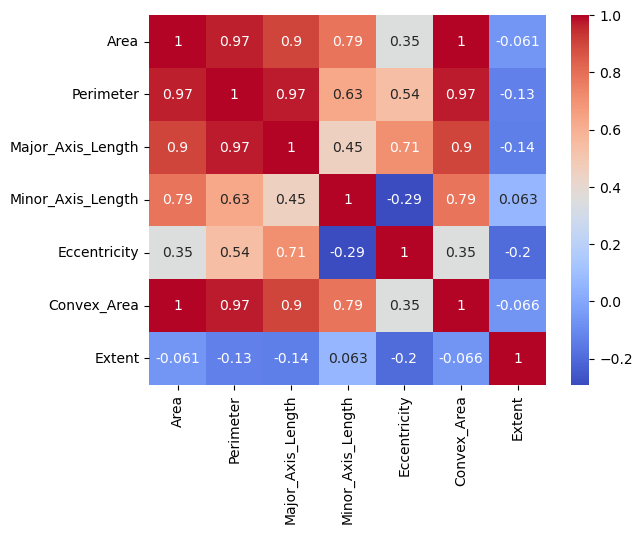

In [96]:
# The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of the relationship.  
# A correlation coefficient of 1 indicates a strong positive relationship.  
# A correlation coefficient of -1 indicates a strong inverse relationship.  
# A correlation coefficient of 0 indicates no relationship.  
# Generally, an absolute value of 0.7 or greater indicates a strong relationship.  
# The diagonal of the correlation matrix will be 1 because each feature is precisely correlated with itself.

import seaborn as sns
# Visually include the correlation coefficient in each cell of the correlation matrix
include_correlation_coefficient_in_each_cell = True
# coolwarm is a color map that indicates the strength of the relationship
# between each feature using a color gradient from blue to red.
color_map = 'coolwarm'
# Correlation matrix
correlation_matrix = X.corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,
    annot=include_correlation_coefficient_in_each_cell,
    cmap=color_map
);

We observe that Area and Perimeter are highly correlated with 97% 

In [97]:
# Create a helper method to record the performance metrics and clustering metrics
# of various algorithms so we can compare the results at the end.
from sklearn.metrics import silhouette_score
# Create a dictionary to store the metrics of each algorithm
metrics = {}
def record_results(optimization_technique_name, labels_, X, description, inertia=None):
    # intra_class_corr calculates the intra-class correlation coefficient (ICC) for data with two 'raters' or 'rater' and one 'rating'.
    # This measure is not related cluster relationship.
    # We attempted to apply this until realizing it was not the correct metric to use.
    # intra_cluster_coefficient = pg.intra_class_corr(X.assign(Class=classifier.labels_), targets=target_feature_name, raters='Area', rating='Perimeter')
    metrics[optimization_technique_name] = {
        'silhouette_score': silhouette_score(X, labels_),
        'inertia': inertia,
        'description': description
    }

## Determine Optimal Number of clusters

We already know the best k is equal to the number of classes, in our case 2,
however we will perform `elbow method` and `silhouette method` to determine the optimal number of clusters to validate our knowledge.

### Elbow method

Measure the inertia which is the intra-cluster distances, or how far instances are from centroid, indicating instances in a cluster are similar for a range of values of k.

Plot the inertia for various values of k and select the value of k where the rate of decrease is maximal.
Visually the graph will depict a bent arm and the optimal value of k will be at the "elbow."

### Shilhouette Method

Measure the shilhouette coefficient which is the average intra-cluster distance and the minimum average inter-cluster distance for various values of k. Select the value of k with the silhouette score closest to 1.

Source: https://datamahadev.com/understanding-k-means-clustering 

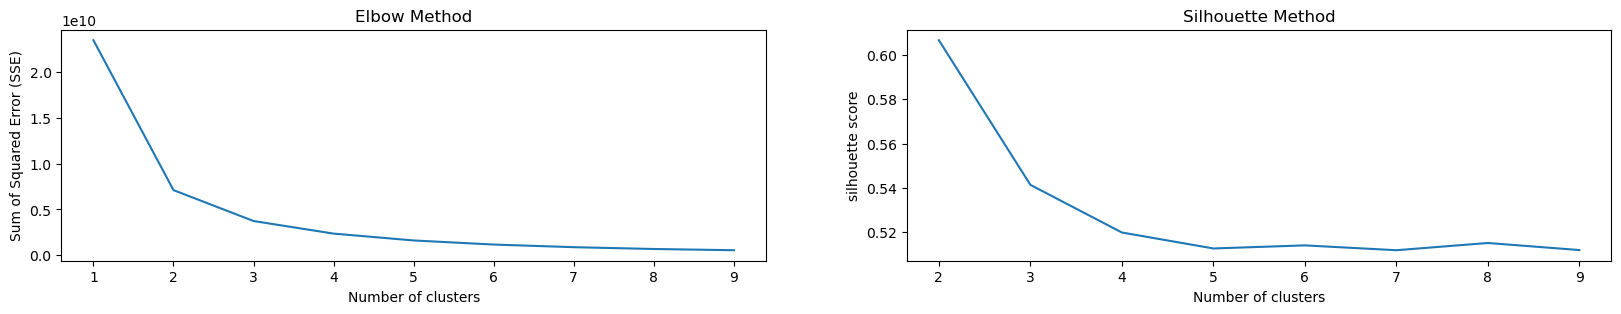

In [110]:
from sklearn.cluster import KMeans
# number of times the k-means algorithm will be run with different centroid seeds
# if not set, this version of scikit-learn will provide a warning.
number_of_executions_with_different_centroid_seeds = 'auto'
# seed to random number generator to make output deterministic when shuffling the dataset
seed_to_make_output_deterministic = 0
# record the interia for various values of k
sum_of_squared_errors_by_k = {}
# record the silhouette score for various values of k
silhouette_score_by_k = {}
# the silhouette score is not defined for a single cluster
minimum_required_number_of_clusters = 2
# try a range of values for k
for k in range(1, 10):
    # perform k-means clustering with k clusters
    kmeans = KMeans(
        n_clusters=k,
        n_init=number_of_executions_with_different_centroid_seeds,
        random_state=seed_to_make_output_deterministic,
        max_iter=1000
    ).fit(X)
    # record the inertia, Sum of distances of samples to their closest cluster center.
    sum_of_squared_errors_by_k[k] = kmeans.inertia_
    # record the silhouette coefficient
    silhouette_score_by_k[k] = None if k < minimum_required_number_of_clusters else silhouette_score(X, kmeans.labels_)
# plot the sum of squared errors for each value of k
fig, axs = plt.subplots(1, 2, figsize=(20, 3))
elbow_plot = axs[0]
silhouette_plot = axs[1]
elbow_plot.plot(
    sum_of_squared_errors_by_k.keys(),
    sum_of_squared_errors_by_k.values()
)
elbow_plot.set_xlabel("Number of clusters")
elbow_plot.set_ylabel("Sum of Squared Error (SSE)")
elbow_plot.set_title("Elbow Method")
# plot the silhouette score for each value of k
silhouette_plot.plot(
    silhouette_score_by_k.keys(),
    silhouette_score_by_k.values()
)
silhouette_plot.set_xlabel("Number of clusters")
silhouette_plot.set_ylabel("silhouette score")
silhouette_plot.set_title("Silhouette Method")
plt.show()

Both methods suggest the optimal number of clusters is 2.
The value of k such that the rate of decrease of SSE is maximized is 2 which is the same value of k with the largest silhouette score.
This is consistent with the fact that there are two classes in the dataset.

## Apply kmeans clustering

Use a kmeans clustering algorithm with the best number of clusters determined by the elbow method. 

In [99]:
from sklearn.cluster import KMeans
# set the number of clusters equal to the number of classes
number_of_clusters = class_names.size
# construct an instance of a KMeans model with optimal number of clusters
kmeans = KMeans(
    n_clusters=number_of_clusters,
    n_init=number_of_executions_with_different_centroid_seeds,
    random_state=seed_to_make_output_deterministic
)
# fit the model to the features excluding the target feature to prove that the model is unsupervised
kmeans.fit(X)
# record the metrics to print at the end
record_results(
    'k_means',
    kmeans.labels_,
    X,
    'K-means clustering with optimal number of clusters',
    kmeans.inertia_
)


## Visualize the clusters and their centroids

In [100]:
# The coordinates of the cluster centers
centroid_coordinates = kmeans.cluster_centers_
centroid_coordinates

array([[1.15126196e+04, 4.30435513e+02, 1.77534336e+02, 8.36778511e+01,
        8.80015885e-01, 1.17647595e+04, 6.67161899e-01],
       [1.44742355e+04, 4.91466450e+02, 2.06357745e+02, 9.04361123e+01,
        8.97590655e-01, 1.48100350e+04, 6.53758029e-01]])

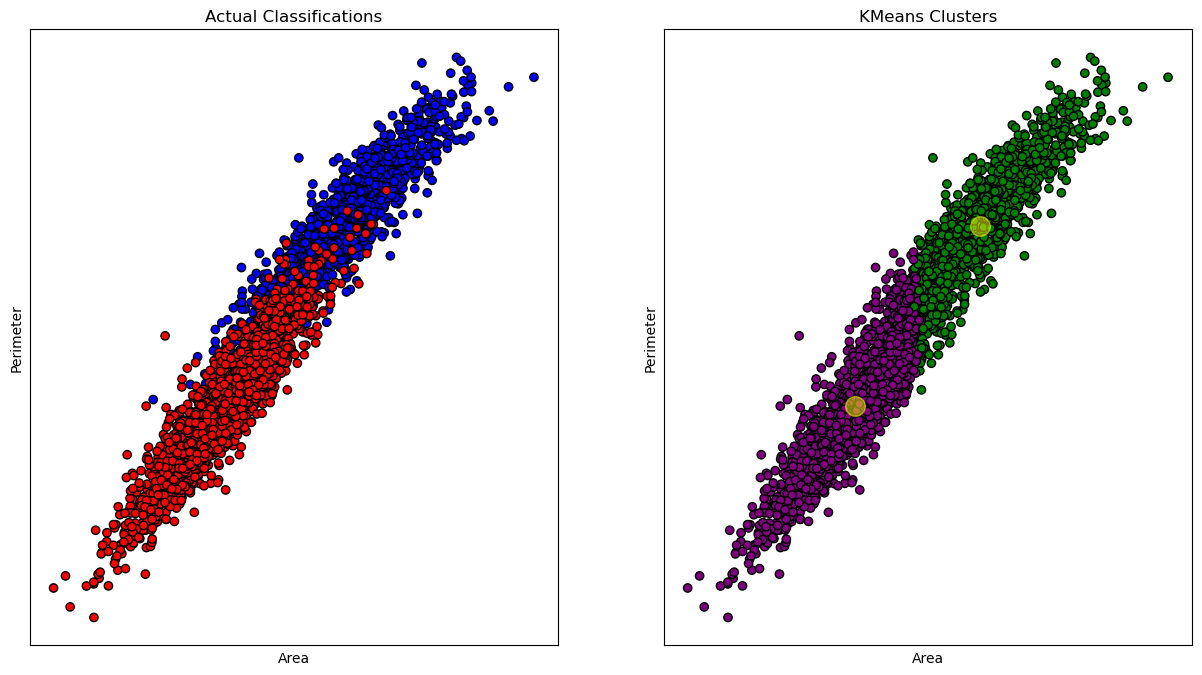

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
# create two subplots, one for the distribution of labels and one for the clusters
subplot_of_labels = axes[0]
subplot_of_clusters = axes[1]
# set the color of the instance borders to differentiate them from one another
instance_border = 'black'
# vector of the first feature
feature_one_vector = X.iloc[:, 0:1]
# vector of the second feature
feature_two_vector = X.iloc[:, 1:2]
def plot_cluster(subplot, label_vector, title, color_map, include_centroids=True):
    # plot the instances
    subplot.scatter(
        feature_one_vector,
        feature_two_vector,
        c=[color_map[y] for y in label_vector],
        edgecolor=instance_border
    )
    if include_centroids:
        # enlarge the centroids to make them more visible
        centroid_size = 200
        # set the color of the centroids to differentiate them from the instances
        centroid_color = 'yellow'
        # set the opacity of the centroids to ensure they are visible but don't obscure the instances
        translucent_alpha = 0.5
        # coordinates of the centroids of each cluster
        cluster_one_centroid = centroid_coordinates[:, 0]
        cluster_two_centroid = centroid_coordinates[:, 1]
        # plot the centroids
        subplot.scatter(
            cluster_one_centroid,
            cluster_two_centroid,
            c=centroid_color,
            s=centroid_size,
            alpha=translucent_alpha
        )
    # label the axes
    subplot.set_xlabel(feature_names[0])
    subplot.set_ylabel(feature_names[1])
    # the values of the features are not important to view the clusters
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_xticklabels([])
    subplot.set_yticklabels([])
    # set the title
    subplot.set_title(title)
# this will tell us to which cluster an instance belong.
cluster_assingment = kmeans.labels_
plot_cluster(subplot_of_labels, y_label, 'Actual Classifications', {0: 'blue', 1: 'red'}, include_centroids=False)
plot_cluster(subplot_of_clusters, cluster_assingment, 'KMeans Clusters', {0: 'purple', 1: 'green'})

We highlighted the clusters centroids generated from the model.

The two predicted clusters mirror the actual classification of the rice. The clusters do not indicate what type of rice a data point is corresponding to, but instead that it is similar to the surrounding data points.

We can choose what class corresponds to each cluster by observing and comparing the actual classifications.


## Additional Preprocessing
Now that we have used kmeans to cluster, we will try to optimize the clustering with additional preprocessing

Feature selection to reduce the dimensionality of the data set.

Normalization, or feature scaling, to mitigate the impact of feature bias.

In [102]:
# Since our initial attempt at unsupervised clustering was abysmal, let's try selecting the best features and see if that improves the results.
from sklearn.feature_selection import SelectKBest, f_classif
# create an instance of a feature selector that will select all the features and order them based on how correlated they are with the target feature
selector = SelectKBest(score_func=f_classif, k=feature_names.size)
# fit the selector to the features and target feature
X_new = selector.fit_transform(X, y_label)
# list the features in order of importance
features_ordered_by_importance = X.columns[selector.get_support()]
# extract the two most important features
df_selected_features = X[features_ordered_by_importance[:2]]
# fit the model to the selected features
kmeans.fit(df_selected_features)
# record the metrics to print at the end
record_results(
    "k_means_with_selected_features",
    kmeans.labels_,
    df_selected_features,
    "K-means clustering with optimal number of clusters and selected features",
    kmeans.inertia_,
)

In [103]:
# Let's try to improve the results by scaling the features.
from sklearn.preprocessing import StandardScaler
# create an instance of a standard scaler
scaler=StandardScaler()
# fit the scaler to the features
scaler.fit(X)
# scale the features
scaled_features = scaler.transform(X)
df_with_scaled_features = pd.DataFrame(scaled_features)
# fit the model to the scaled features
kmeans.fit(df_with_scaled_features)
# record the metrics to print at the end
record_results(
    "k_means_with_normalization",
    kmeans.labels_,
    df_with_scaled_features,
    "K-means clustering with optimal number of clusters and normalization",
    kmeans.inertia_
)

## Compare clustering algorithms

Let's attempt clustering with a variety of other clustering algorithms. 

In [104]:
# hierarchical, bottom-up clustering
# Each data point starts in its own cluster and
# pairs of clusters are merged together until only one cluster remains.
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=number_of_clusters)
model.fit(X)
record_results(
    "agglomerative_clustering",
    model.labels_,
    X,
    "Agglomerative hierarchal clustering"
)

In [105]:
# Unlike k-means, Guassian mixture does not require spherical clusters.
from sklearn.mixture import GaussianMixture
model = GaussianMixture(
    n_components=number_of_clusters,
    covariance_type='diag',
    init_params='k-means++'
)
model.fit(X)
record_results(
    "gaussian_mixture",
    model.predict(X),
    X,
    "Gaussian mixture model"
)

In [106]:
# Unlike k-means, Affinity propagation does not require the number of clusters to be specified.
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(max_iter=10)
model.fit(X)
record_results(
    "affinity_propagation",
    model.labels_,
    X,
    "Affinity propagation"
)

c:\Users\walkersmith\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


## Compare clustering quality

### Silhouette Score
Measures how compact the data points are in the cluster and how far away clusters are from one another. A score ranges from -1 to 1 such that 1 indicates tightly packed clusters that are well separated, and -1 indicates the opposite.

### Inertia

Measures intra-cluster distances, or how far instances are from centroid, indicating instances in a cluster are similar. Low inertia values indicated better clustering. 

In [107]:
# Pretty print the dataframe using the dictionary keys as the row names and the dictionary values as the column values
orient_frame_with_key_value_pairs_as_rows = 'index'
# Remove the column width constraint so the entire description is displayed instead of being truncated with ellipsis
pd.set_option('display.max_colwidth', None)
# create a dataframe from the dictionary of performance metrics using the dictionary keys as the row names
pd.DataFrame.from_dict(metrics, orient=orient_frame_with_key_value_pairs_as_rows)

,silhouette_score,inertia,description
k_means,0.606582,7.104225e+09,K-means clustering with optimal number of clusters
k_means_with_selected_features,0.605888,3.479985e+09,K-means clustering with optimal number of clusters and selected features
k_means_with_normalization,0.409961,1.392879e+04,K-means clustering with optimal number of clusters and normalization
agglomerative_clustering,0.606561,NaN,Agglomerative hierarchal clustering
gaussian_mixture,0.566788,NaN,Gaussian mixture model
affinity_propagation,0.300683,NaN,Affinity propagation


* Normalizing the dataset before applying kmeans produced a better inertia value but a worse silhouette score than apply kmeans without preprocessing. This implies the clusters were more compact, but closer together.

* Affinity propagation produced low quality clusters, and arrived at over 2000 clusters instead of 2.

* Guassian mixture does not require spherical clusters like kmeans. Given our data was a long continous ellipsis shape, we expected higher quality clusters, but found slightly lower quality clusters than kmeans.

* Agglomerative hierarchical, bottom-up clustering performed nearly as well at clustering as kmeans.

The silhouette did not change drastically as expected, since the number of clusters, k, corresponds to the number of types of rice in our dataset. The types of rice were similar across almost all features resulting in clusters that are close together.


## Classification

The clustering algorithm does not indicate which cluster should correspond to each class. Instead, a human applies their understanding of the domain to determine what class each cluster represents. Now that we have performed clustering and compared metrics to know which optimization produced the best clustering, we will apply a classification technique. We will choose KNearestNeighbor since the silhouette score and elbow method indicated good clustering which is needed by knn to create neighborhoods. 

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
# create an instance of a KNN classifier with the optimal number of neighbors
classifier = KNeighborsClassifier(n_neighbors=class_names.size)
number_of_folds = 5
# perform 5-fold cross validation
scores = cross_val_score(classifier, X, y_label, cv=number_of_folds)
# print the cross-validation scores
print(f'Mean cross validation score: {scores.mean()}\n')
# fit the classifier to the features and target feature
classifier.fit(X, y_label)
# predict the class labels of the instances
y_pred = classifier.predict(X)
# create a classification report to evaluate the performance of the classifier
report = classification_report(
    y_label,
    y_pred,
    target_names=class_names
)
print(report)

Mean cross validation score: 0.8538057742782152

              precision    recall  f1-score   support

      Cammeo       0.87      1.00      0.93      1630
    Osmancik       1.00      0.89      0.94      2180

    accuracy                           0.94      3810
   macro avg       0.94      0.94      0.94      3810
weighted avg       0.95      0.94      0.94      3810



The clustering algorithm created good clusters. The classification algorithm performed well and relied on clustering, validating that the clustering algorithm was effective. The clustering and classification algorithm are effective with this dataset. 